In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_curve,auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image
import os

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
top_50_path = "/content/drive/My Drive/facescrub_top_50_classes"




train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,   # تحريك الصورة أفقياً
    height_shift_range=0.2,  # تحريك الصورة عمودياً
    shear_range=0.2,         # تشويه القص
    brightness_range=[0.8, 1.2],  # تغيير سطوع الصورة
    horizontal_flip=True,
    validation_split=0.2
)
val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

In [ ]:
train_generator_densenet = train_datagen.flow_from_directory(
    top_50_path,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)
val_generator_densenet = train_datagen.flow_from_directory(
    top_50_path,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4615 images belonging to 50 classes.
Found 1129 images belonging to 50 classes.


In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128,128, 3))

for layer in base_model.layers[:-20]:  # قم بتجميد الطبقات الأولى فقط
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(train_generator_densenet.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# file_path = "/content/drive/My Drive/densenet_checkpoint.keras"

# # إنشاء الملف بامتداد .keras
# with open(file_path, "w") as file:
#     file.write("")  # ملف فارغ

# print(f"File created at: {file_path}")
# from tensorflow.keras.callbacks import ModelCheckpoint

# # تعريف مسار الحفظ
# checkpoint_path = "/content/drive/My Drive/densenet_checkpoint.keras"

# # إنشاء كائن ModelCheckpoint
# checkpoint = ModelCheckpoint(
#     filepath=checkpoint_path,  # مسار الحفظ
#     monitor='val_loss',       # معيار المراقبة
#     save_best_only=True,      # حفظ النموذج فقط إذا كان أفضل من السابق
#     verbose=1                 # عرض رسائل عند الحفظ
# )

In [ ]:
history = model.fit(
    train_generator_densenet,
    steps_per_epoch=train_generator_densenet.samples // train_generator_densenet.batch_size,
    epochs=10,
    # callbacks=[checkpoint]
    validation_data=val_generator_densenet,  # إضافة بيانات التحقق
    validation_steps=val_generator_densenet.samples // val_generator_densenet.batch_size  # تحديد خطوات التحقق
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 1532s 19s/step - accuracy: 0.1790 - loss: 3.4436 - val_accuracy: 0.0496 - val_loss: 7.5172
Epoch 2/10
 1/72 ━━━━━━━━━━━━━━━━━━━━ 13:12 11s/step - accuracy: 0.5781 - loss: 1.5545

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.5781 - loss: 1.5545 - val_accuracy: 0.1220 - val_loss: 8.0392
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 844s 11s/step - accuracy: 0.6363 - loss: 1.2855 - val_accuracy: 0.2969 - val_loss: 3.9296
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6562 - loss: 1.0010 - val_accuracy: 0.2927 - val_loss: 3.8630
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 740s 10s/step - accuracy: 0.8119 - loss: 0.6741 - val_accuracy: 0.4697 - val_loss: 2.2958
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8281 - loss: 0.5478 - val_accuracy: 0.4634 - val_loss: 2.5836
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 715s 10s/step - accuracy: 0.8456 - loss: 0.5296 - val_accuracy: 0.3272 - val_loss: 3.8350
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7344 - loss: 0.9445 - val_accuracy: 0.3659 - val_loss: 4.3293
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 726s 10s/step - accuracy: 0.8327 - loss: 0.5802 - val_accuracy: 0.4614 - val_

In [ ]:
loss, accuracy = model.evaluate(val_generator_densenet)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5245 - loss: 2.0305
Validation Accuracy: 52.26%


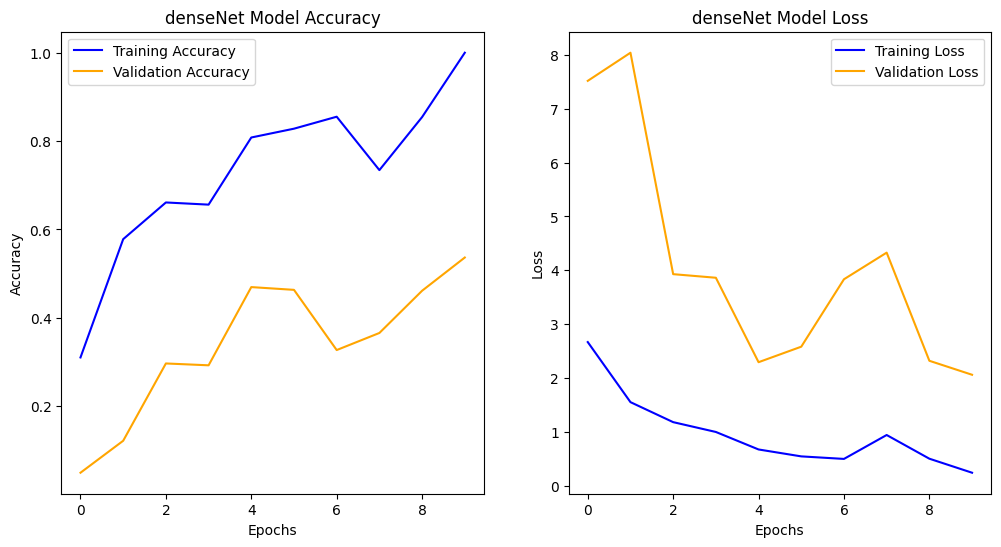

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('denseNet Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('denseNet Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
all_imgs = []
all_labels = []

for i in range(len(val_generator_densenet)):
    imgs, labels = next(val_generator_densenet)
    all_imgs.append(imgs)
    all_labels.append(labels)

# تحويل القوائم إلى مصفوفات
all_imgs = np.vstack(all_imgs)
all_labels = np.vstack(all_labels)

# التنبؤ بكل الصور دفعة واحدة
y_pred = model.predict(all_imgs)

# تحويل التنبؤات إلى الفئات
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(all_labels, axis=1)

# عرض النتائج
print("Predicted Classes:", y_pred_classes[:10])
print("True Classes:", y_true_classes[:10])

36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step
Predicted Classes: [49 37 36 18 33 23 37  0 30  6]
True Classes: [13 37 19 18 33 18 42  0 20 25]


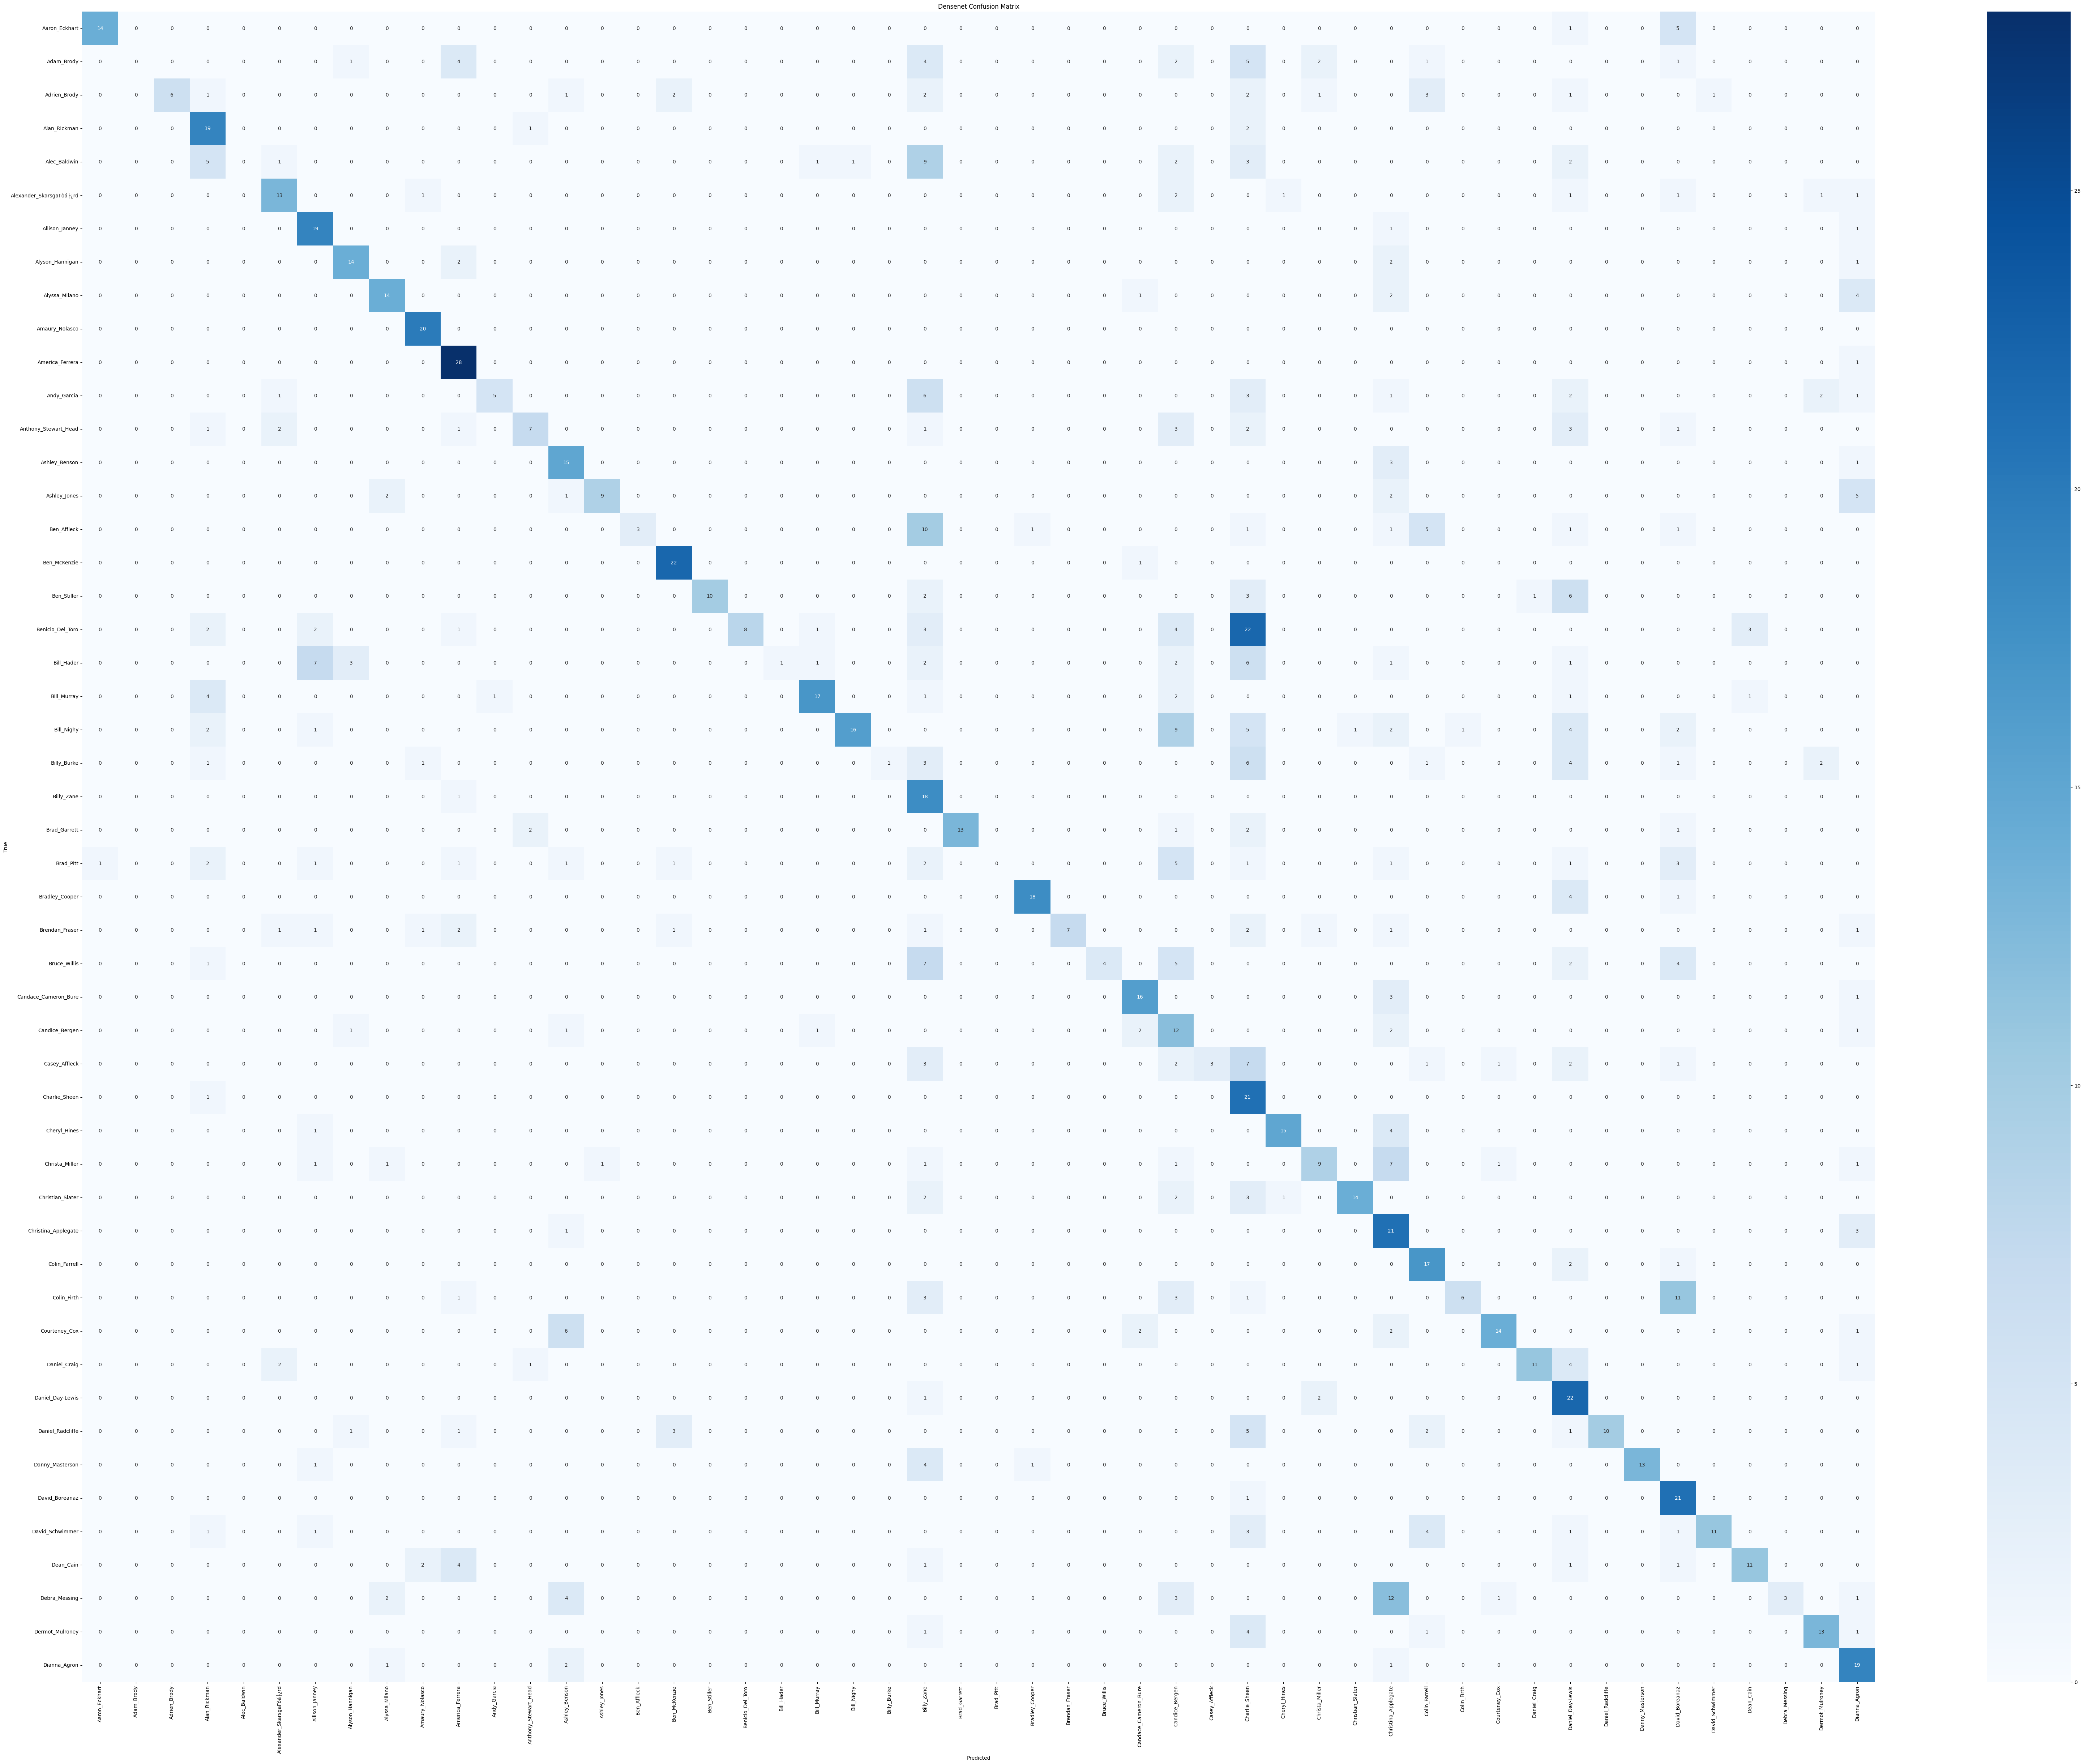

In [ ]:
import seaborn as sns
xception_cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(80, 60))
sns.heatmap(xception_cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_generator_densenet.class_indices.keys(), yticklabels=val_generator_densenet.class_indices.keys())
plt.title("Densenet Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.72
Recall: 0.53
F1-Score: 0.52


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


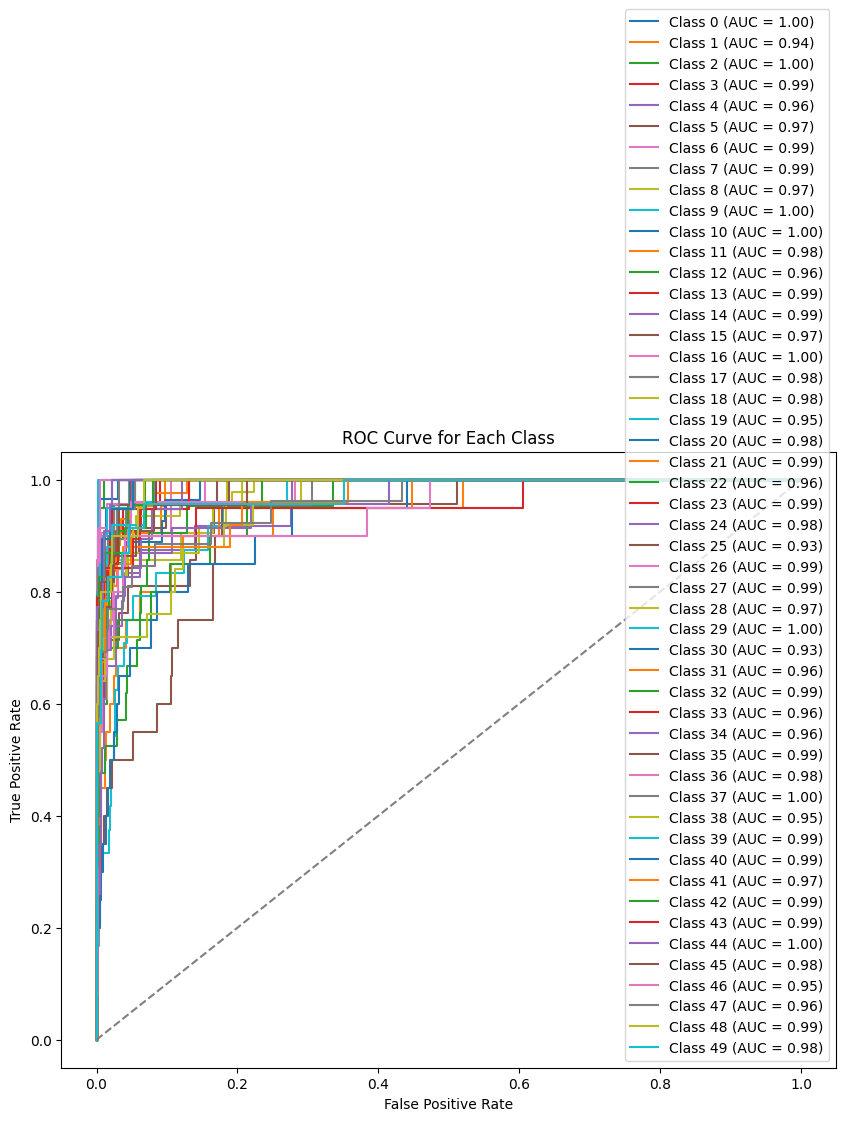

In [ ]:
from sklearn.preprocessing import label_binarize

n_classes = all_labels.shape[1]  # number of classes
y_true_bin = label_binarize(y_true_classes, classes=np.arange(n_classes))
y_pred_bin = y_pred  # The raw prediction probabilities

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)

    # Plotting each class ROC curve
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random classifier (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')

# Show the plot
plt.show()

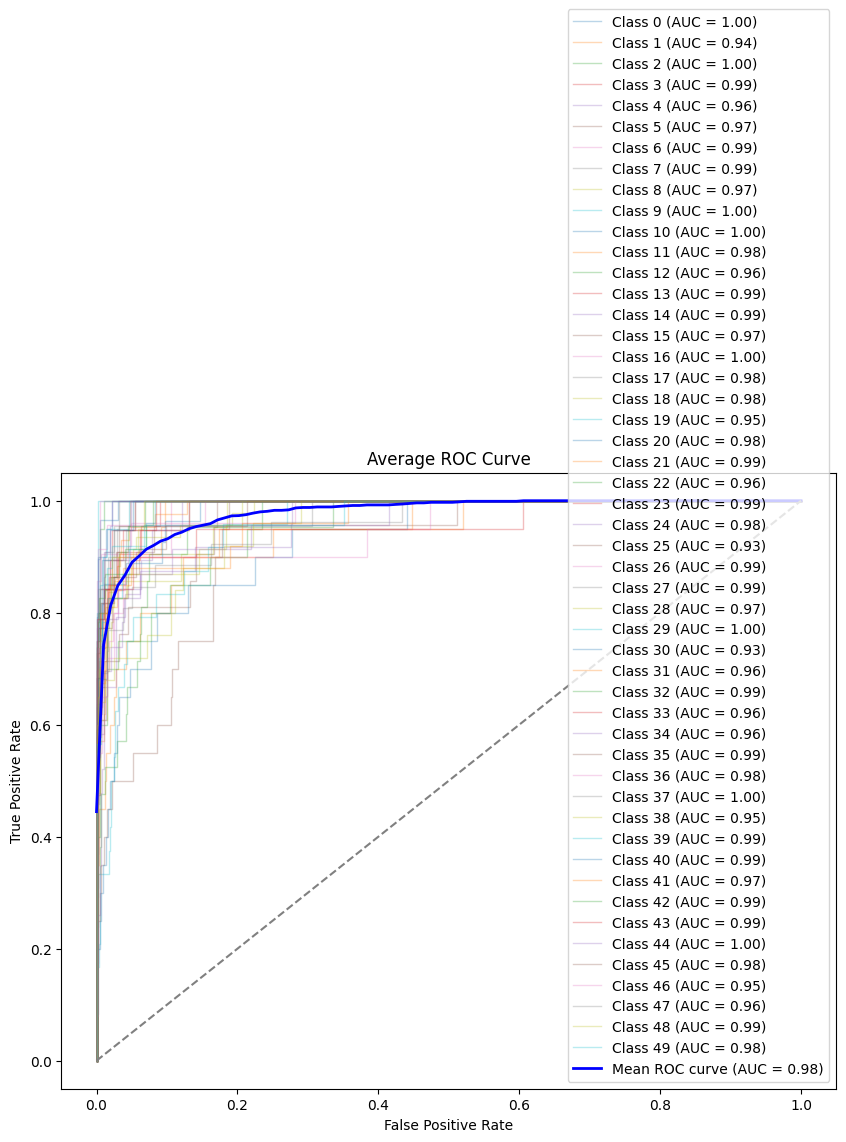

In [ ]:
n_classes = all_labels.shape[1]  # number of classes
y_true_bin = label_binarize(y_true_classes, classes=np.arange(n_classes))
y_pred_bin = y_pred  # The raw prediction probabilities

fpr_all = []
tpr_all = []
roc_auc_all = []

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_all.append(fpr)
    tpr_all.append(tpr)
    roc_auc_all.append(roc_auc)
    # Calculate the mean ROC curve
# First, interpolate the TPR at common FPR points
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr_all[i], tpr_all[i])

mean_tpr /= n_classes

# Calculate the AUC for the average ROC curve
mean_roc_auc = auc(mean_fpr, mean_tpr)

# Plotting the ROC curves for each class and the average curve
plt.figure(figsize=(10, 8))

# Plot the individual class ROC curves
for i in range(n_classes):
    plt.plot(fpr_all[i], tpr_all[i], lw=1, alpha=0.3, label=f'Class {i} (AUC = {roc_auc_all[i]:.2f})')

# Plot the average ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {mean_roc_auc:.2f})', lw=2)

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve')
plt.legend(loc='lower right')
# Show the plot
plt.show()